In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [9]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [26]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
print(common_df.shape)
common_df.head()

(87439, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [27]:
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
common_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [53]:
target = '서울'
target_purpose = '준주거'

In [54]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(4445, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
17799,서울특별시 영등포구 영등포동1가,9*,준주거지역,-,2017-09-25,5.33,72990.0,13694.183865,45270.027608,토지,NaN
33224,서울특별시 성동구 성수동1가,6**,준주거지역,-,2020-02-24,1.36,10416.0,7658.823529,25318.423941,토지,NaN
33240,서울특별시 성동구 성수동1가,6**,준주거지역,-,2020-02-24,11.41,86751.0,7603.067485,25134.106445,토지,NaN
39999,서울특별시 성북구 보문동1가,1**,준주거지역,8m미만,2021-01-29,7.30,55000.0,7534.246575,24906.599315,토지,NaN
39408,서울특별시 성북구 보문동1가,1**,준주거지역,8m미만,2020-12-31,7.30,55000.0,7534.246575,24906.599315,토지,NaN


In [42]:
target_df.to_excel(basedir + '성내동/sungnae1.xlsx')

In [55]:
target_df = target_df[target_df['단가(평)'] <= 10000]

<AxesSubplot:title={'center':'2015~최신 서울 준주거주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 4343건의 단가 산포도와 회귀선'}, ylabel='단가(평)'>

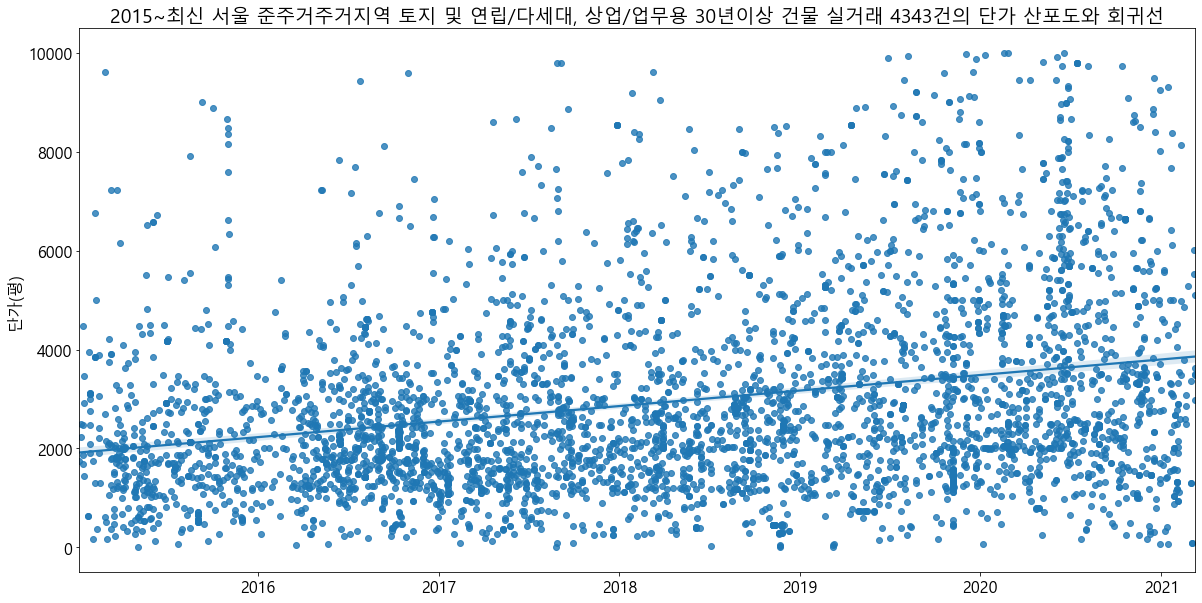

In [56]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose, target_df.shape[0]))
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])

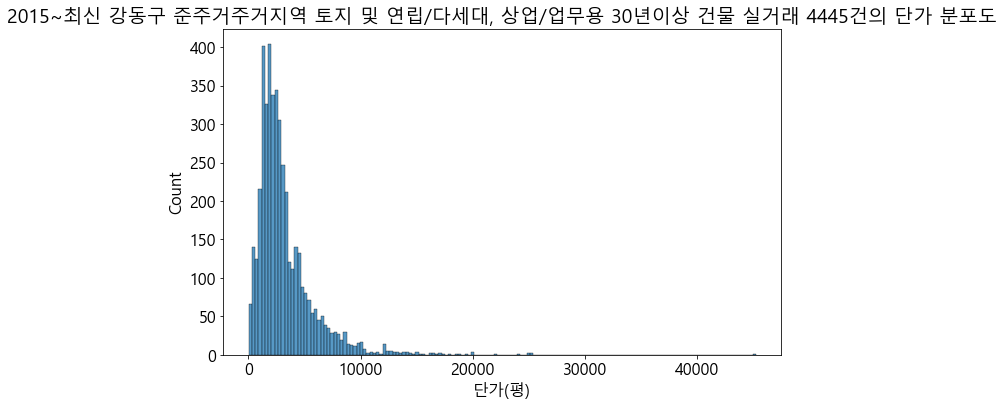

거래량: 4445.0
평균: 3212.902489579945
표준편차: 2640.4520298134485
최소: 6.61157
25분위: 1604.3401021711368
중간값: 2498.4315676567658
75분위: 4016.528775
최대: 45270.02760787993


<Figure size 432x288 with 0 Axes>

In [45]:
f, ax = plt.subplots(figsize=(10,6))
plt.title('2015~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])

In [46]:
over_10000_df = target_df[target_df['단가(평)'] >= 10000]
over_10000_df.shape

(102, 11)

In [47]:
over_10000_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
17799,서울특별시 영등포구 영등포동1가,9*,준주거지역,-,2017-09-25,5.33,72990.0,13694.183865,45270.027608,토지,NaN
33224,서울특별시 성동구 성수동1가,6**,준주거지역,-,2020-02-24,1.36,10416.0,7658.823529,25318.423941,토지,NaN
33240,서울특별시 성동구 성수동1가,6**,준주거지역,-,2020-02-24,11.41,86751.0,7603.067485,25134.106445,토지,NaN
39999,서울특별시 성북구 보문동1가,1**,준주거지역,8m미만,2021-01-29,7.30,55000.0,7534.246575,24906.599315,토지,NaN
39408,서울특별시 성북구 보문동1가,1**,준주거지역,8m미만,2020-12-31,7.30,55000.0,7534.246575,24906.599315,토지,NaN


In [ ]:
for year in target1_df['계약날짜'].dt.year.unique():
    year_df = target1_df[target1_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose1, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [ ]:
target1_df['단가(평)'].describe()

In [ ]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose2, target2_df.shape[0]))
ax.xaxis.update_units(target2_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target2_df['계약날짜']), y=target2_df['단가(평)'])

In [ ]:
print(land_df.shape)
land_df.head()

In [ ]:
land_target_df = land_df[land_df['시군구'].str.contains('천호동')]
print(land_target_df.shape)
land_target_df.head()

In [ ]:
land_target1_df = land_target_df[land_target_df['용도지역'].str.contains(target_purpose1)]
print(land_target1_df.shape)
land_target1_df.head()

In [ ]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {}주거지역 토지  실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose1, land_target1_df.shape[0]))
ax.xaxis.update_units(land_target1_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(land_target1_df['계약날짜']), y=land_target1_df['단가(평)'])

In [ ]:
land_target1_df.tail(50)